In [1]:
palette = ['#3B8EA1', '#B84D4A', '#6F5B9A', '#B59F8E', '#D96B9A', '#A3A3A3', '#D88F3B', '#4C9F4A']
from pathlib import Path
growth_data = Path("..") / "data" / "other_data" / "growth_rate"
figure = Path("..") / "figures"
from scipy import stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df_od = pd.read_csv(f"{growth_data}\\ADSL_complementation_20112023_corrected.csv")

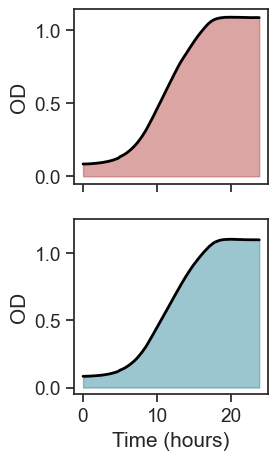

In [3]:
sns.set(font_scale=1.25, font="arial", style="ticks")
fig, axes = plt.subplots(2, 1, figsize=(2.5, 5), sharex=True)  # Adjust figsize to match 2x3 grid
axes_flat = axes.flatten()
columns = ["high_c", "high_d"]
colors = ['#B84D4A', '#3B8EA1']

for col, ax, color in zip(columns, axes_flat, colors):
    sns.lineplot(data=df_od, x="time", y=col, ax=ax, linewidth=2, color="black")
    ax.fill_between(df_od["time"], df_od[col], color=color, alpha=0.5)
    ax.set_xlabel("Time (hours)")
    ax.set_ylabel("OD")
plt.ylim(-0.05,1.25)

plt.subplots_adjust(wspace=0.15, hspace=0.2)
#plt.savefig(f"{figure}figure.svg", format="svg", bbox_inches="tight")
#plt.close()

In [4]:
def logistic_growth(t, N0, K, r):
    """
    Logistic growth model function in the form:
    Nt = K / (1 + ((K - N0) / N0) * exp(-r * t))

    Parameters:
        t (array-like): Time variable.
        N0 (float): Initial population size (at t=0).
        K (float): Carrying capacity (maximum population size).
        r (float): Intrinsic growth rate.
    Returns:
        np.ndarray: Values of the population at time t.
    """
    return K / (1 + ((K - N0) / N0) * np.exp(-r * t))

In [5]:
def growth_param(dataframe, sample):
    """
    Calculate growth parameters from experimental data using the logistic growth model
    and evaluate fit quality.

    Parameters:
        dataframe (DataFrame): Pandas DataFrame containing experimental data.
        sample (str): Name of the column in the DataFrame containing the experimental data.

    Returns:
        DataFrame: DataFrame containing growth parameters and fit metrics.
    """
    time = dataframe["time"]
    od = dataframe[sample]
    
    # Fit the logistic growth model to the experimental data
    popt, pcov = curve_fit(logistic_growth, time, od, maxfev=10000)
    N0, K, r = popt
    
    # Calculate predicted values using fitted parameters
    od_pred = logistic_growth(time, N0, K, r)
    # Calculate R²
    ss_res = np.sum((od - od_pred) ** 2)  # Residual sum of squares
    ss_tot = np.sum((od - np.mean(od)) ** 2)  # Total sum of squares
    r_squared = 1 - (ss_res / ss_tot)
    # Calculate MSE and RMSE
    mse = np.mean((od - od_pred) ** 2)
    rmse = np.sqrt(mse)
    
    # Growth parameters and fit metrics
    doubling_time = np.log(2) / r  # doubling time
    # Construct a DataFrame to store growth parameters and fit metrics
    df_param = pd.DataFrame({
        "params": ["initial_population", "carrying_capacity", "growth_rate", 
                   "doubling_time", "R_squared", "MSE", "RMSE"],
        "values": [N0, K, r, doubling_time, r_squared, mse, rmse]
    })
    # Plotting
    sns.set(font_scale=0.5, font="arial", rc={'figure.figsize': (2.5, 2.5)}, style="ticks")
    sns.scatterplot(x=time, y=od, label='Experimental Data', color='gray', marker='o', s=20)  
    plt.text(7.5,0.1, f"Growth rate: {round(r,3)}", fontsize = 10, color = "red")
    plt.title('Logistic Growth Model Fit')
    plt.xlabel('Time')
    plt.ylabel('Optical Density (OD)')
    plt.legend(loc="upper left")
    plt.grid()  # Uncomment if you want to add a grid
    plt.show()
    return df_param

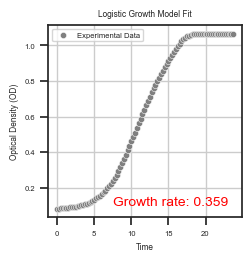

,params,values
0,initial_population,0.022307
1,carrying_capacity,1.108841
2,growth_rate,0.358539
3,doubling_time,1.933257
4,R_squared,0.996040
5,MSE,0.000631
6,RMSE,0.025114


In [6]:
growth_param(df_od, "high_c_1")

In [3]:
low_d = np.mean([0.253, 0.271, 0.254])
low_c = np.mean([0.346, 0.346, 0.345])

high_d = np.mean([0.355, 0.347, 0.352])
high_c = np.mean([0.359, 0.354, 0.358])

cont_c = np.mean([0.322, 0.335, 0.333])
cont_d = np.mean([0, 0, 0])

#round(high_c/low_d,2)

In [5]:
x = [0.355, 0.347, 0.352] #high(dox+)
y = [0.254, 0.271, 0.253]#low(dox+)

In [6]:
ttest_one = 0.0001270585259306258 # low (+) vs high (+)
t_stat, p_value = stats.ttest_ind(x, y)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 14.627970744087742, P-value: 0.0001270585259306258


Text(2.25, 0.025, 'no growth')

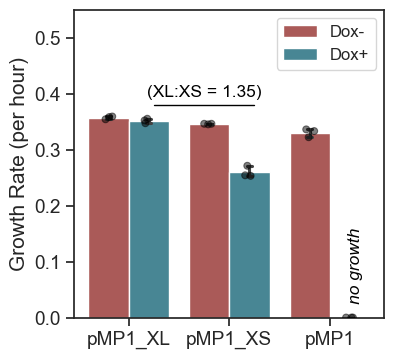

In [8]:
df_gr = pd.read_csv(f"{growth_data}\\ADSL_growth_rate_20112023.csv")
sns.set(font_scale = 1.25, font = "arial", rc={'figure.figsize':(4,4)}, style = "ticks")
sns.barplot(data = df_gr, x = "strain", y = "grate", hue = "treatment", palette = [palette[1], palette[0]], capsize = 0.1)
sns.stripplot(data=df_gr, x="strain", y="grate", hue="treatment", dodge=True, palette=["black","black"], 
              linewidth=0.75, edgecolor="black", alpha=0.5, legend = False)
plt.ylabel("Growth Rate (per hour)")
plt.ylim(0.0,0.55)
plt.xlabel("")
plt.xticks([0,1,2], ["pMP1_XL", "pMP1_XS", "pMP1"])
plt.legend(loc = "upper right", fontsize = 12)
plt.text(0.75, 0.39, "(XL:XS = 1.35)", ha="center", va="bottom", fontsize=12.5, color="black")
plt.plot([0.25, 1.25], [0.38, 0.38], color='black', lw=1)
plt.text(2.25, 0.025, "no growth", ha="center", va="bottom", fontsize=12.5, color="black", rotation = 90, fontstyle = "italic")
#plt.savefig(f"{figure}figure.svg", format = "svg", bbox_inches='tight')
#plt.close()